# Model Training and Evaluation
This notebook includes the training and evaluation of both linear and polynomial regression models.

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib

## Data Wrangling

In [11]:
# Load the dataset
data = pd.read_csv('2.Model_Development/2.1.Data_Wrangling/2.1.2.Diabeties_Sample_Data.csv')

# Handle missing values
data = data.dropna(subset=[ 'SEX', 'Target'])

# Remove all females
data = data[data['SEX'] == 'Male']

# Convert DoB and DoT to datetime
data['DoB'] = pd.to_datetime(data['DoB'], format='%d/%m/%Y')
data['DoT'] = pd.to_datetime(data['DoT'], format='%d/%m/%Y')

# Calculate AGE
data['AGE'] = (data['DoT'] - data['DoB']).dt.days / 365.25

# Drop original DoB and DoT columns
data = data.drop(columns=['DoB', 'DoT'])

# Handle missing values
data = data.dropna()

# Convert categorical variables to numerical values
data['SEX'] = data['SEX'].map({'Female': 0, 'Male': 1})

# Remove outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Save the new dataset
new_data_path = '/workspaces/2025SE_ElliottP_MLOPS/2.Model_Development/2.1.Data_Wrangling/2.1.2.Diabeties_Sample_Data_with_Age.csv'
data.to_csv(new_data_path, index=False)

# Display the first few rows of the dataset
data.head()

,SEX,BMI,BP,TC,BGU,FDR,Target,AGE
2,1,18.5,87.0,2.67,80,2,90.0,42.992471
3,1,18.6,97.0,2.00,83,2,101.0,21.976728
4,1,18.8,78.0,2.00,86,2,85.0,23.080082
5,1,18.8,83.0,3.00,69,2,51.0,26.110883
9,1,19.2,87.0,2.00,90,0,137.0,19.353867


In [12]:
# Split the data into features and target
X = data[['BMI', 'FDR']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression Model

In [13]:
# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate error metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R2: {r2_linear}')

Linear Regression MSE: 4062.354996581749
Linear Regression MAE: 53.29926075318151
Linear Regression R2: 0.31507375150346373


## Polynomial Regression Model

In [14]:
# Transform the features to polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the polynomial features into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Predict on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate error metrics
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f'Polynomial Regression MSE: {mse_poly}')
print(f'Polynomial Regression MAE: {mae_poly}')
print(f'Polynomial Regression R2: {r2_poly}')

Polynomial Regression MSE: 3609.147951567088
Polynomial Regression MAE: 50.78563402160581
Polynomial Regression R2: 0.3914859314816509


## Model Comparison

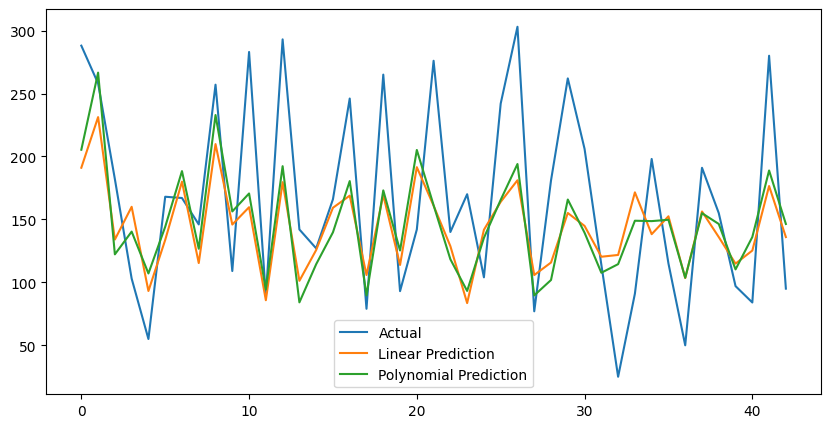

In [15]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_linear, label='Linear Prediction')
plt.plot(y_pred_poly, label='Polynomial Prediction')
plt.legend()
plt.show()

In [17]:

# Create scatter plots
x_name = ['BMI','BP','FDR']
y_name = 'Target'

x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

y_pred = linear_model.predict(x)
fig, ax = plt.subplots(1, len(x_name), figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i], y, label='target')
    ax[i].set_xlabel(x_name[i])
    ax[i].scatter(x[:,i], y_pred, color="orange", label='predict')
ax[0].set_ylabel("Target")
ax[0].legend()
fig.suptitle("Diabetes Disease Progress")
plt.show()

NameError: name 'training_data' is not defined

## Save the Model

In [ ]:
import joblib
joblib.dump(linear_model, '/workspaces/2025SE_ElliottP_MLOPS/2.Model_Development/2.4.Model_Testing_and_Validation/my_saved_model_v1.sav')
joblib.dump(poly_model, '/workspaces/2025SE_ElliottP_MLOPS/2.Model_Development/2.4.Model_Testing_and_Validation/poly_my_saved_model_v1.sav')

['/workspaces/2025SE_ElliottP_MLOPS/2.Model_Development/2.4.Model_Testing_and_Validation/poly_my_saved_model_v1.sav']